In [30]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# from the Scikit-learn package import 
# Decision Tree classifier for building a 
# decision tree model.
from sklearn.tree import DecisionTreeClassifier

# Visualise Decision Tree
from sklearn.tree import plot_tree

# For model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the titanic dataset into a DataFrame
titanic_df = pd.read_csv('titanic.csv')

# preview the DataFrame
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The attributes that I will use to predict whether a passenger survived the Titanic or not are; Pclass, Sex, Age, Fare and Embarked. I will extract these attributes by using indexing. The X variable will consist of 'Pclass', 'Sex', 'Age', 'Fare' and 'Embarked'. The y variable will be the target feature which is 'Survived'.

In [2]:
# Drop the attributes that will not be used in
# the prediction and create a new DataFrame
titanic_df2 = titanic_df.drop(['PassengerId', 'Name', 'SibSp', 
                               'Parch', 'Ticket', 'Cabin'], axis= 1)

In [3]:
#Investigate if there are any missing values within the attributes.
titanic_df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

Drop the 179 records that contain missing ages.

In [4]:
# Drop all the rows that have any missing number
# set inplace to True, to permanently change the dataframe.
titanic_df2.dropna(axis=0, how= 'any', inplace= True)

Encode the Sex and Embarked columns; Male as 0 and Female as 1, Southampton (S) as 1, Cherboug (C) as 2 and Queenstown (Q) as 3.

In [5]:
# Assign the values 0 and 1 to the Sex column
# Use replace() to replace the old values (male, femael)
# with the new values (0, 1)
titanic_df2['Sex'] = titanic_df2['Sex'].replace(['male','female'],[0, 1])

# view the unique values of the Sex column
titanic_df2['Sex'].unique()

array([0, 1], dtype=int64)

In [6]:
# Assign the values 0, 1 and 2 to the Embarked
# column. 
# use replace() to replace S, C, Q with 0, 1 and 2

# Define the dictionary of values to translate
clean_embark = {'S': 0, 'C': 1, 'Q': 2}

titanic_df2['Embarked'] = titanic_df2['Embarked'].replace(clean_embark)

# change the dtype from float64 to int64
titanic_df2['Embarked'].astype('int64')

0      0
1      1
2      0
3      0
4      0
      ..
885    2
886    0
887    0
889    1
890    2
Name: Embarked, Length: 712, dtype: int64

In [7]:
# view the DataFrame
titanic_df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0


#### Assign the X and y variables

In [8]:
# The X variable consists of the following 
# attributes; Pclass, Sex, Age, Fare and Embarked.
X = titanic_df2.iloc[:,[1,2,3,4,5,]].values
X.shape

(712, 5)

In [9]:
# The target feature 'Survived' is the y variable
y = titanic_df2.iloc[:,0].values
y.shape

(712,)

#### Split data into training, validation and test sets

First split the data into training and test sets, set the test_size to 0.2. The inital split leads to 80 % data used in the training set and 20% of the data used for the test set. Compute a second split on the training set and set the test_size to 0.25. The second split results in the validation set being 25% of the 80% and the training set being 75% of the 80%. Overall the data has been split into 20% testing data, 20% validation data and 60% training data.

In [10]:
# Split into training and test sets
# set shuffle to True to ensure that all the values
# are distributed within the training and test set.
# Use the stratify parameter to ensure there is an equal 
# proportion of values in the training ans test sets.
# Set the value for random_state to 8, random_state ensures
# that the data is split along the same parameters.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle = True, stratify = y, random_state=8)

# Split the training set into training and 
# validation set. Set the value for random_state to 8
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size= 0.25, stratify=y_train, random_state=8)

#### Decision Tree Model

The response variable, y, is catergorical therefore the model created will be a classification tree.

In [11]:
# Create Decision Tree classifier object,
# this will create a classification model by building a
# decision tree. 
# Set the max_depth to None so that we obtain an 
# unrestricted Decision Tree.
clf = DecisionTreeClassifier(max_depth=None, random_state=8)

In [12]:
# Train the decision tree, by fitting it with
# X_train and y_train.
clf = clf.fit(X_train,y_train)

In [32]:
# Compute the accuracy of the model on the validation set
# the accuracy_score method from sklearn library
# will calculate the accuracy of our model.
# Use the classifier tree model to predict the y
# variable using the X variable from the validation set
y_val_pred = clf.predict(X_val)

# compute the accuracy
accuracy_score(y_val, y_val_pred)


0.8111888111888111

This means that we have 81% accuracy.

#### Plot Decision Tree

Use the plot_tree function from the Scikit-learn library and the matplotlib library to plot the Decision Tree.

In [29]:
# Define the size of the plot
# set filled to True so that the majority of the class
# can be easily spotted by the use of colour.

# convert y to a string
y = str(y)

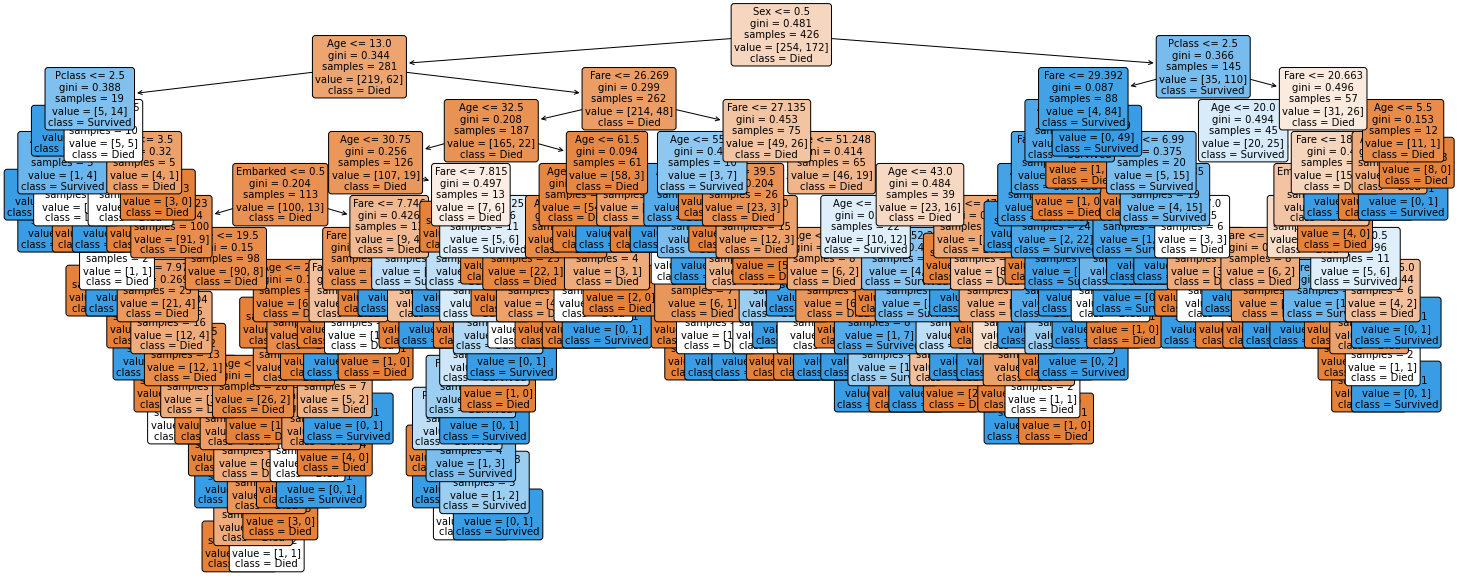

In [28]:
# clf is the classification tree model
# feature name is the list of all the feature variables
# class_name is the target feature in numerical order
plt.figure(figsize=(25,10))
a = plot_tree(clf, 
          feature_names=('Pclass', 'Sex', 'Age', 'Fare', 'Embarked'),
          class_names=('Died', 'Survived'),
          rounded= True, filled=True, fontsize=10)

#### Plot accuracies for validation and training sets at different max_depth levels

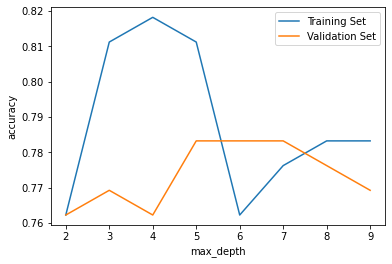

In [51]:
# Define an empty list for max_depth,
max_depth = []

# define an empty list to store the accuracies obtained
# using the training set
acc_train = []

# and accuracies obtained using the validation set
acc_val = []

# Our range defines the limits for our max_depth levels
for i in range(2,10):
    
    # Create a Decision Tree Classifier object for 
    # a given max_depth level i, starting at 2
    # ending at 10.
    # random_state is not None so that we can plot the 
    # same accuracies
    clf = DecisionTreeClassifier(max_depth=i, random_state=8)
    
    # fit the training set on the classification
    # tree model
    clf.fit(X_train, y_train)
    
    # predict the y variable using X_test
    y_pred = clf.predict(X_test)
    
    # append the accuracy score to the list
    # acc_train
    acc_train.append(accuracy_score(y_test, y_pred))

    # Create a Decision Tree Classifier object for 
    # a given max_depth level i, starting at 2
    # ending at 10.
    clf2 = DecisionTreeClassifier(max_depth=i, random_state=8)
    
    # fit the validation set on the classification
    # tree model
    clf2.fit(X_val, y_val)
    
    # predict the y variable using X_test
    pred = clf2.predict(X_test)
    
    # append the accuracy score to the list
    # acc_train
    acc_val.append(accuracy_score(y_test, pred))

    # after each accuracy score for both trained and dev
    # set is computed, append the corresponding max_depth
    # level to the list for max_depth.
    max_depth.append(i)
    
# Define a new dataframe that consists of 
# max_depth, acc_train and acc_val as columns
# such that for each max_depth we have a corresponding 
# accuracy score for the trained set and the validation 
# set. 

# Using a dictionary, where the keys are the column 
# names and the values are numpy arrays of the calculated 
# max_depth and accuracies.
data = pd.DataFrame({'acc_train':pd.Series(acc_train), 
 'acc_val':pd.Series(acc_val),
 'max_depth':pd.Series(max_depth)})

# visualizing the accuracies at each max_depth level
# Create plots using the pyplot function

# Plot the accuracies of the trained set
# On the x-axis is max_depth and the accuracies 
# are plotted on the y-axis.
# Using data from the DataFrame above.
plt.plot('max_depth', 'acc_train', data=data, label='Training Set')

# Plot the accuracies of the validation set
plt.plot('max_depth','acc_val', data=data, label='Validation Set')

# Label for the x-axis
plt.xlabel('max_depth')

# Label for the x-axis
plt.ylabel('accuracy')
plt.legend()

The line plot above indicate the accuracy of the model to predict the response variable based on the training set, blue line, and the validation set, orange line. The data was split into 60% training, 20% validation and 20% test set. All sets achieved an accuracy above 76%, that means models trained using the training or validation sets achieves 76% accuracy in predicting the response variable. I think the validation set achieved lower accuracies because it contained less data points. The training set achieves the highest score of accuracy at max_depth = 4 and the lowest at max_depth = 6. The validation set achieves the highest score of accuracy at max_depth = 5 and the lowest at max_depth = 4.

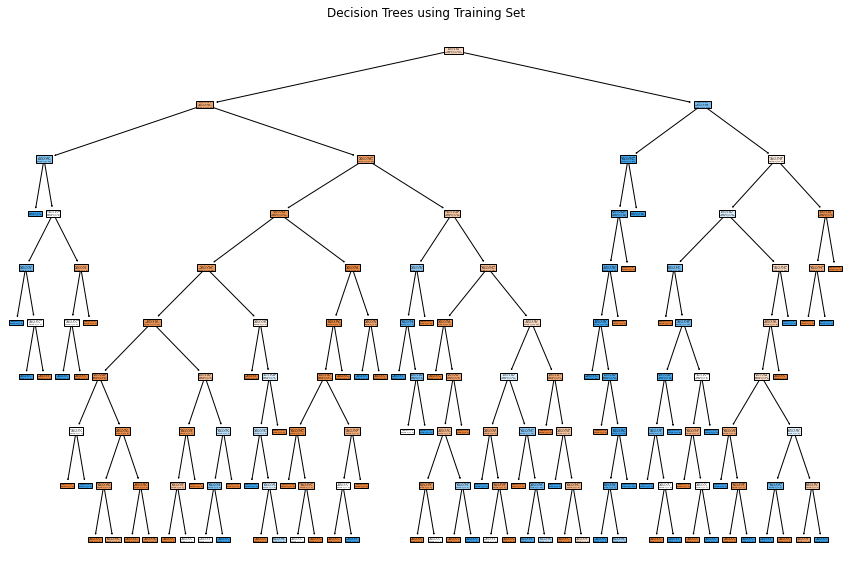

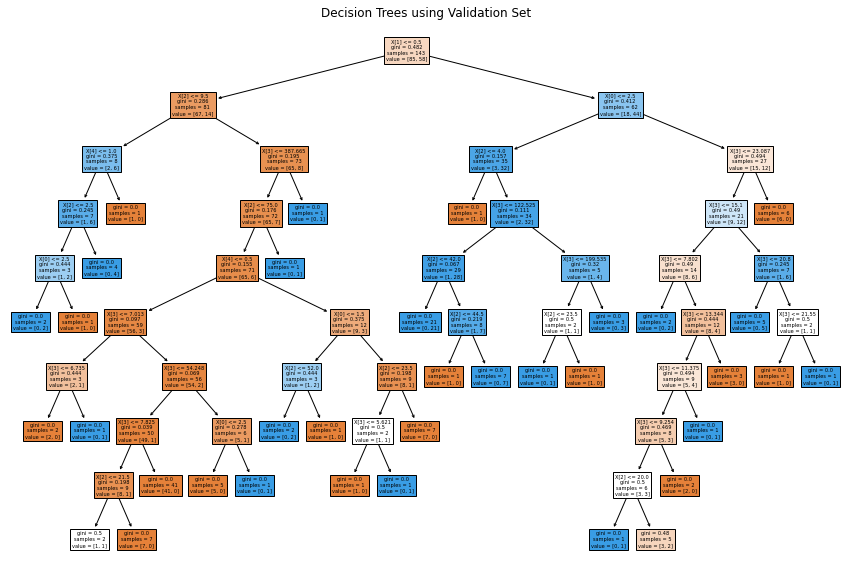

In [53]:
# Plot the decision tree with corresponding max_depth
plt.figure(figsize=(15,10))
a = plot_tree(clf, max_depth = i, filled=True)
plt.title('Decision Trees using Training Set')
    
# Second plot   
plt.figure(figsize=(15,10))
b = plot_tree(clf2, max_depth =i, filled=True)
plt.title('Decision Trees using Validation Set')
    
# Save to png file
plt.savefig('Decision Trees.png')

#### Bibliography

1. Decision Tree Classification - https://www.datacamp.com/community/tutorials/decision-tree-classification-python

2. Split data into training, validation and test sets - https://www.malicksarr.com/split-train-test-validation-python/#:~:text=Split%20the%20dataset,use%20as%20the%20test%20set.

3. Use for random_state - https://www.kaggle.com/questions-and-answers/49890

4. Plot Decision Tree 

- https://www.justintodata.com/visualize-a-decision-tree-in-python/

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

5. Plotting the accuracies of the validation and training set at different max_depth levels - https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752